# Some more advanced Pandas stuff with MultiIndex

In [1]:
# from mikeio1d import Res1D

# res = Res1D('./data/BlueBeach_network.res1d')
# res

<mikeio1d.Res1D>

In [2]:
# To use MultiIndex feature, you need to specify the column_mode on read().

# df = res.reaches.read(column_mode='compact')
# df.head(5)

quantity            WaterLevel                                              \
group                    Reach                                               
name                     River                                               
chainage            0.000000   20.000103  40.000111  60.000126  80.000023    
tag                  0.0-702.0  0.0-702.0  0.0-702.0  0.0-702.0  0.0-702.0   
2007-01-01 11:00:00   8.462200   7.302400   7.021300   7.219800   6.540200   
2007-01-01 11:00:30   8.685686   7.596246   7.164650   7.219963   6.542018   
2007-01-01 11:01:00   8.686770   7.662206   7.388865   7.257162   6.550722   
2007-01-01 11:01:30   8.687520   7.700077   7.485518   7.366961   6.725432   
2007-01-01 11:02:00   8.687700   7.701020   7.463614   7.412680   6.933987   

quantity                                                                    \
group                                                                        
name                                                                         
chainage            100.000038 120.000046 140.000015 146.000000 169.000000   
tag                  0.0-702.0  0.0-702.0  0.0-702.0  0.0-702.0  0.0-702.0   
2007-01-01 11:00:00   6.530000   6.526400   5.800000   4.460000   4.780000   
2007-01-01 11:00:30   6.534694   6.529129   5.811738   4.516238   4.780241   
2007-01-01 11:01:00   6.548632   6.537150   5.820538   4.701184   4.780966   
2007-01-01 11:01:30   6.580698   6.550328   5.833669   4.868277   4.782222   
2007-01-01 11:02:00   6.772875   6.586141   5.885475   5.045981   4.784055   

quantity             ... FlowVelocity                                   \
group                ...        Reach                                    
name                 ...      SWM4993    SWM4994               SWM5164   
chainage             ...   34.866321  18.396989  55.190967  28.019041    
tag                  ...     0.0-69.7   0.0-73.6   0.0-73.6   0.0-56.0   
2007-01-01 11:00:00  ...     0.007515  -0.004165  -0.004165   0.035945   
2007-01-01 11:00:30  ...     0.007498  -0.004166  -0.004171   0.036310   
2007-01-01 11:01:00  ...     0.007497  -0.004166  -0.004171   0.036523   
2007-01-01 11:01:30  ...     0.007493  -0.004164  -0.004170   0.096838   
2007-01-01 11:02:00  ...     0.007485  -0.004161  -0.004170   0.281922   

quantity                                                                    \
group                                                                        
name                   SWM5165    SWM5250    SWM5251    SWM5252    SWM5281   
chainage            7.961098   9.900532   18.650517  25.732757  26.045576    
tag                   0.0-15.9   0.0-19.8   0.0-37.3   0.0-51.5   0.0-52.1   
2007-01-01 11:00:00   0.011146   0.121283   0.014176   0.012227   0.007093   
2007-01-01 11:00:30   0.012964   0.120843   0.014154   0.012208   0.007069   
2007-01-01 11:01:00   0.014724   0.121059   0.014152   0.012212   0.007075   
2007-01-01 11:01:30   0.018389   0.121851   0.014143   0.012853   0.007778   
2007-01-01 11:02:00   0.030169   0.122468   0.014173   0.018316   0.010487   

quantity                        
group                           
name                   SWM5294  
chainage            25.534690   
tag                   0.0-51.1  
2007-01-01 11:00:00   0.015873  
2007-01-01 11:00:30   0.002035  
2007-01-01 11:01:00   0.001540  
2007-01-01 11:01:30   0.001917  
2007-01-01 11:02:00   0.004670  

[5 rows x 862 columns]

In [39]:
# Build multiline statements, with queries, and aggregation along chainage.

# (
#    res.read(column_mode='compact')
#    .m1d.query("name == 'River' and quantity == 'WaterLevel'")
#    .T.droplevel('tag').T
#    .m1d.groupby_chainage().nth(0)
# )

quantity,WaterLevel
group,Reach
name,River
chainage,0.0
2007-01-01 11:00:00,8.462200
2007-01-01 11:00:30,8.685686
2007-01-01 11:01:00,8.686770
2007-01-01 11:01:30,8.687520
2007-01-01 11:02:00,8.687700
...,...
2007-01-01 13:28:00,8.706641


<Axes: xlabel='chainage'>

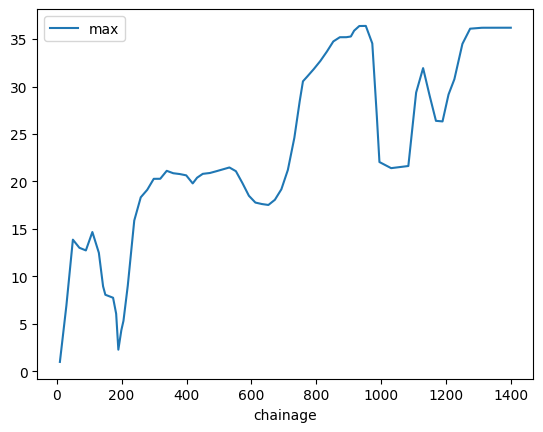

In [46]:
# How could we show a 'maximum' profile?
# (
#    res.read(column_mode='compact')
#    .m1d.query("name == 'River' and quantity == 'Discharge'")
#    .agg(['max']).T
#    .droplevel(['quantity','group','name','tag'])
#    .plot()
# )